# Prosper Loans - Data Exploration
## by Ernest Rowe

#### Dataset: [Loan Data from Prosper](https://www.google.com/url?q=https://s3.amazonaws.com/udacity-hosted-downloads/ud651/prosperLoanData.csv&sa=D&ust=1546576456543000)
_**Additional data from:** [census.gov](https://www2.census.gov/programs-surveys/popest/datasets/2010-2018/national/totals/nst-est2018-alldata.csv)_

This dataset contains 113,937 loans with 81 variables, including loan amount, borrower interest rate, current loan status, borrower income, and many others. More information on the variables in this dataset can be found [here](https://www.google.com/url?q=https://docs.google.com/spreadsheet/ccc?key%3D0AllIqIyvWZdadDd5NTlqZ1pBMHlsUjdrOTZHaVBuSlE%26usp%3Dsharing&sa=D&ust=1546576456544000).

In [1]:
# Import packages, set plots to be embedded inline, & set pandas max_columns to none.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, Math, Latex

%matplotlib inline
pd.set_option('display.max_columns', None)

In [2]:
# Import loan data & display summary of data.
df = pd.read_csv('./data/prosper_loan_data.csv', parse_dates=['ListingCreationDate', 'ClosedDate', 'DateCreditPulled', 
                                                              'FirstRecordedCreditLine', 'LoanOriginationDate'])

display(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
ListingKey                             113937 non-null object
ListingNumber                          113937 non-null int64
ListingCreationDate                    113937 non-null datetime64[ns]
CreditGrade                            28953 non-null object
Term                                   113937 non-null int64
LoanStatus                             113937 non-null object
ClosedDate                             55089 non-null datetime64[ns]
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
LenderYield                            113937 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
Prospe

None

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263,C,36,Completed,2009-08-14,0.16516,0.1580,0.1380,NaN,NaN,NaN,NaN,NaN,NaN,0,CO,Other,Self-employed,2.0,True,True,NaN,2007-08-26 18:41:46.780,640.0,659.0,2001-10-11,5.0,4.0,12.0,1,24.0,3.0,3.0,2.0,472.0,4.0,0.0,0.0,0.0,0.00,1500.0,11.0,0.81,0.0,0.17,"$25,000-49,999",True,3083.333333,E33A3400205839220442E84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,78,19141,9425,2007-09-12,Q3 2007,1F3E3376408759268057EDA,330.43,11396.14,9425.00,1971.14,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900,NaN,36,Current,NaT,0.12016,0.0920,0.0820,0.07960,0.0249,0.05470,6.0,A,7.0,2,CO,Professional,Employed,44.0,False,False,NaN,2014-02-27 08:28:14.000,680.0,699.0,1996-03-18,14.0,14.0,29.0,13,389.0,3.0,5.0,0.0,0.0,0.0,1.0,0.0,3989.0,0.21,10266.0,29.0,1.00,2.0,0.18,"$50,000-74,999",True,6125.000000,9E3B37071505919926B1D82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,134815,10000,2014-03-03,Q1 2014,1D13370546739025387B2F4,318.93,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090,HR,36,Completed,2009-12-17,0.28269,0.2750,0.2400,NaN,NaN,NaN,NaN,NaN,NaN,0,GA,Other,Not available,NaN,False,True,783C3371218786870A73D20,2007-01-02 14:09:10.060,480.0,499.0,2002-07-27,NaN,NaN,3.0,0,0.0,0.0,1.0,1.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.06,Not displayed,True,2083.333333,6954337960046817851BCB2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,86,6466,3001,2007-01-17,Q1 2007,5F7033715035555618FA612,123.32,4186.63,3001.00,1185.63,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010,NaN,36,Current,NaT,0.12528,0.0974,0.0874,0.08490,0.0249,0.06000,6.0,A,9.0,16,GA,Skilled Labor,Employed,113.0,True,False,NaN,2012-10-22 11:02:32.000,800.0,819.0,1983-02-28,5.0,5.0,29.0,7,115.0,0.0,1.0,4.0,10056.0,14.0,0.0,0.0,1444.0,0.04,30754.0,26.0,0.76,0.0,0.15,"$25,000-49,999",True,2875.000000,A0393664465886295619C51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,16,77296,10000,2012-11-01,Q4 2012,9ADE356069835475068C6D2,321.45,5143.20,4091.09,1052.11,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097,NaN,36,Current,NaT,0.24614,0.2085,0.1985,0.18316,0.0925,0.09066,3.0,D,4.0,2,MN,Executive,Employed,44.0,True,False,NaN,2013-09-14 18:38:44.000,680.0,699.0,2004-02-20,19.0,19.0,49.0,6,220.0,1.0,9.0,0.0,0.

## Preliminary Cleaning

In [3]:
# Make a copy for cleaning.
df_clean = df.copy()

In [4]:
# Duplicate records are identical except for their ProsperScore value.
duplicate_loans = df_clean[df_clean.ListingKey.duplicated()].ListingKey.values
for i in range(5):
    display(df_clean[df_clean.ListingKey == duplicate_loans[i]])

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
8,0F043596202561788EA13D5,1023355,2013-12-02 10:43:39.117,NaN,36,Current,NaT,0.0762,0.0629,0.0529,0.05221,0.0099,0.04231,7.0,AA,9.0,7,IL,Food Service,Employed,269.0,True,False,NaN,2013-12-02 10:43:39,820.0,839.0,1993-04-01,17.0,16.0,32.0,12,219.0,1.0,6.0,0.0,0.0,0.0,0.0,0.0,9906.0,0.11,77696.0,29.0,1.0,1.0,0.25,"$25,000-49,999",True,3333.333333,02163700809231365A56A1C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,3,121268,10000,2013-12-12,Q4 2013,49A53699682291323D04D66,305.54,611.08,505.58,105.5,-16.77,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
9,0F043596202561788EA13D5,1023355,2013-12-02 10:43:39.117,NaN,36,Current,NaT,0.0762,0.0629,0.0529,0.05221,0.0099,0.04231,7.0,AA,11.0,7,IL,Food Service,Employed,269.0,True,False,NaN,2013-12-02 10:43:39,820.0,839.0,1993-04-01,17.0,16.0,32.0,12,219.0,1.0,6.0,0.0,0.0,0.0,0.0,0.0,9906.0,0.11,77696.0,29.0,1.0,1.0,0.25,"$25,000-49,999",True,3333.333333,02163700809231365A56A1C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,3,121268,10000,2013-12-12,Q4 2013,49A53699682291323D04D66,305.54,611.08,505.58,105.5,-16.77,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1


,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
998,0A0635972629771021E38F3,1055932,2013-12-18 14:25:17.053,NaN,60,Current,NaT,0.1771,0.1535,0.1435,0.13507,0.0599,0.07517,5.0,B,6.0,1,MD,Other,Employed,100.0,True,False,NaN,2014-02-08 11:39:13,760.0,779.0,1994-11-01,16.0,16.0,34.0,15,623.0,1.0,5.0,0.0,0.0,0.0,0.0,0.0,8028.0,0.27,14190.0,32.0,0.96,1.0,0.35,"$25,000-49,999",True,3750.0,CB643706582969191E8C26B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,1,132043,10000,2014-02-12,Q1 2014,98A937006186534818378B9,239.74,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
999,0A0635972629771021E38F3,1055932,2013-12-18 14:25:17.053,NaN,60,Current,NaT,0.1771,0.1535,0.1435,0.13507,0.0599,0.07517,5.0,B,7.0,1,MD,Other,Employed,100.0,True,False,NaN,2014-02-08 11:39:13,760.0,779.0,1994-11-01,16.0,16.0,34.0,15,623.0,1.0,5.0,0.0,0.0,0.0,0.0,0.0,8028.0,0.27,14190.0,32.0,0.96,1.0,0.35,"$25,000-49,999",True,3750.0,CB643706582969191E8C26B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,1,132043,10000,2014-02-12,Q1 2014,98A937006186534818378B9,239.74,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
57494,0A0635972629771021E38F3,1055932,2013-12-18 14:25:17.053,NaN,60,Current,NaT,0.1771,0.1535,0.1435,0.13507,0.0599,0.07517,5.0,B,8.0,1,MD,Other,Employed,100.0,True,False,NaN,2014-02-08 11:39:13,760.0,779.0,1994-11-01,16.0,16.0,34.0,15,623.0,1.0,5.0,0.0,0.0,0.0,0.0,0.0,8028.0,0.27,14190.0,32.0,0.96,1.0,0.35,"$25,000-49,999",True,3750.0,CB643706582969191E8C26B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,1,132043,10000,2014-02-12,Q1 2014,98A937006186534818378B9,239.74,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1


,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
1554,2D2635984503681189056B4,1097584,2014-01-11 07:50:08.037,NaN,60,Current,NaT,0.14528,0.1224,0.1124,0.10731,0.0424,0.06491,5.0,B,9.0,1,NJ,Police Officer/Correction Officer,Employed,107.0,True,False,NaN,2014-03-07 10:04:00,720.0,739.0,1996-07-01,19.0,18.0,27.0,15,1024.0,1.0,5.0,0.0,0.0,0.0,0.0,0.0,20802.0,0.4,26503.0,26.0,1.0,1.0,0.18,"$100,000+",True,10833.333333,DC303708663304668E74587,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,135375,35000,2014-03-11,Q1 2014,07B33702526608187DB957A,782.81,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2539,2D2635984503681189056B4,1097584,2014-01-11 07:50:08.037,NaN,60,Current,NaT,0.14528,0.1224,0.1124,0.10731,0.0424,0.06491,5.0,B,10.0,1,NJ,Police Officer/Correction Officer,Employed,107.0,True,False,NaN,2014-03-07 10:04:00,720.0,739.0,1996-07-01,19.0,18.0,27.0,15,1024.0,1.0,5.0,0.0,0.0,0.0,0.0,0.0,20802.0,0.4,26503.0,26.0,1.0,1.0,0.18,"$100,000+",True,10833.333333,DC303708663304668E74587,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,135375,35000,2014-03-11,Q1 2014,07B33702526608187DB957A,782.81,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1


,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
1803,4B7E3590031274113F1FD34,927246,2013-09-26 09:35:36.317,NaN,36,Current,NaT,0.35356,0.3134,0.3034,0.27598,0.1625,0.11348,1.0,HR,3.0,7,MI,Laborer,Employed,336.0,True,False,NaN,2013-09-26 09:35:36,640.0,659.0,1978-09-01,7.0,6.0,39.0,6,129.0,3.0,9.0,0.0,0.0,56.0,1.0,0.0,943.0,0.51,798.0,31.0,0.56,2.0,0.07,"$50,000-74,999",True,4583.333333,8D84369399064302947D8B5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,5,103928,4000,2013-10-01,Q4 2013,5E653693258374071BBC02C,172.76,863.8,362.81,500.99,-15.98,0.0,0.0,0.0,0.0,1.0,0,0,0.0,40
4942,4B7E3590031274113F1FD34,927246,2013-09-26 09:35:36.317,NaN,36,Current,NaT,0.35356,0.3134,0.3034,0.27598,0.1625,0.11348,1.0,HR,2.0,7,MI,Laborer,Employed,336.0,True,False,NaN,2013-09-26 09:35:36,640.0,659.0,1978-09-01,7.0,6.0,39.0,6,129.0,3.0,9.0,0.0,0.0,56.0,1.0,0.0,943.0,0.51,798.0,31.0,0.56,2.0,0.07,"$50,000-74,999",True,4583.333333,8D84369399064302947D8B5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,5,103928,4000,2013-10-01,Q4 2013,5E653693258374071BBC02C,172.76,863.8,362.81,500.99,-15.98,0.0,0.0,0.0,0.0,1.0,0,0,0.0,40


,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
5811,94B035909835592957503E6,920397,2013-09-24 13:27:48.287,NaN,36,Current,NaT,0.24205,0.2045,0.1945,0.1797,0.0899,0.0898,4.0,C,3.0,1,GA,NaN,Other,0.0,True,False,NaN,2013-10-30 17:36:21,700.0,719.0,1986-02-10,19.0,18.0,35.0,16,1383.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,47018.0,0.96,1513.0,34.0,1.0,2.0,0.62,"$50,000-74,999",True,4166.666667,129C369881799628360C904,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,4,110525,15000,2013-11-14,Q4 2013,37A336938902363103488F4,560.9,1674.2959,925.57,748.7259,-37.03,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
5812,94B035909835592957503E6,920397,2013-09-24 13:27:48.287,NaN,36,Current,NaT,0.24205,0.2045,0.1945,0.1797,0.0899,0.0898,4.0,C,4.0,1,GA,NaN,Other,0.0,True,False,NaN,2013-10-30 17:36:21,700.0,719.0,1986-02-10,19.0,18.0,35.0,16,1383.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,47018.0,0.96,1513.0,34.0,1.0,2.0,0.62,"$50,000-74,999",True,4166.666667,129C369881799628360C904,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,4,110525,15000,2013-11-14,Q4 2013,37A336938902363103488F4,560.9,1674.2959,925.57,748.7259,-37.03,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1


In [5]:
# Remove duplicates & drop ProsperScore column. Remaining entries should have unique ListingKeys.
df_clean = df_clean[~df_clean.ListingKey.duplicated()].drop(columns='ProsperScore').reset_index(drop=True)
df_clean.head(10)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263,C,36,Completed,2009-08-14,0.16516,0.1580,0.1380,NaN,NaN,NaN,NaN,NaN,0,CO,Other,Self-employed,2.0,True,True,NaN,2007-08-26 18:41:46.780,640.0,659.0,2001-10-11,5.0,4.0,12.0,1,24.0,3.0,3.0,2.0,472.0,4.0,0.0,0.0,0.0,0.00,1500.0,11.0,0.81,0.0,0.17,"$25,000-49,999",True,3083.333333,E33A3400205839220442E84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,78,19141,9425,2007-09-12,Q3 2007,1F3E3376408759268057EDA,330.43,11396.14,9425.00,1971.14,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900,NaN,36,Current,NaT,0.12016,0.0920,0.0820,0.07960,0.0249,0.05470,6.0,A,2,CO,Professional,Employed,44.0,False,False,NaN,2014-02-27 08:28:14.000,680.0,699.0,1996-03-18,14.0,14.0,29.0,13,389.0,3.0,5.0,0.0,0.0,0.0,1.0,0.0,3989.0,0.21,10266.0,29.0,1.00,2.0,0.18,"$50,000-74,999",True,6125.000000,9E3B37071505919926B1D82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,134815,10000,2014-03-03,Q1 2014,1D13370546739025387B2F4,318.93,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090,HR,36,Completed,2009-12-17,0.28269,0.2750,0.2400,NaN,NaN,NaN,NaN,NaN,0,GA,Other,Not available,NaN,False,True,783C3371218786870A73D20,2007-01-02 14:09:10.060,480.0,499.0,2002-07-27,NaN,NaN,3.0,0,0.0,0.0,1.0,1.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.06,Not displayed,True,2083.333333,6954337960046817851BCB2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,86,6466,3001,2007-01-17,Q1 2007,5F7033715035555618FA612,123.32,4186.63,3001.00,1185.63,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010,NaN,36,Current,NaT,0.12528,0.0974,0.0874,0.08490,0.0249,0.06000,6.0,A,16,GA,Skilled Labor,Employed,113.0,True,False,NaN,2012-10-22 11:02:32.000,800.0,819.0,1983-02-28,5.0,5.0,29.0,7,115.0,0.0,1.0,4.0,10056.0,14.0,0.0,0.0,1444.0,0.04,30754.0,26.0,0.76,0.0,0.15,"$25,000-49,999",True,2875.000000,A0393664465886295619C51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,16,77296,10000,2012-11-01,Q4 2012,9ADE356069835475068C6D2,321.45,5143.20,4091.09,1052.11,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097,NaN,36,Current,NaT,0.24614,0.2085,0.1985,0.18316,0.0925,0.09066,3.0,D,2,MN,Executive,Employed,44.0,True,False,NaN,2013-09-14 18:38:44.000,680.0,699.0,2004-02-20,19.0,19.0,49.0,6,220.0,1.0,9.0,0.0,0.0,0.0,0.0,0.0,6193.0,0.81,695.0,3

In [6]:
# Create column with Year & Month from LoanOriginationDate column.
df_clean['OriginationYearMonth'] = df_clean.LoanOriginationDate.dt.to_period('m')

In [7]:
# Create column with Year from LoanOriginationDate column.
df_clean['OriginationYear'] = df_clean.LoanOriginationDate.dt.to_period('y').astype('category')

In [8]:
# CreditGrade was replaced by ProsperRating (Alpha) for loans originated after July 2009. Create a combined column with all
    # ratings.
df_clean['ProsperCreditGrade'] = df_clean['ProsperRating (Alpha)'].astype(str).str.replace('nan', '') +\
                           df_clean['CreditGrade'].astype(str).str.replace('nan', '')

df_clean['ProsperCreditGrade'].head()

0     C
1     A
2    HR
3     A
4     D
Name: ProsperCreditGrade, dtype: object

In [9]:
# Fill blank spaces with N/A.
df_clean['ProsperCreditGrade'] = df_clean.ProsperCreditGrade.replace('', 'N/A')
df_clean['ProsperCreditGrade'].unique()

array(['C', 'A', 'HR', 'D', 'B', 'E', 'AA', 'N/A', 'NC'], dtype=object)

In [10]:
# Create ListingCategory column by remapping ListingColumn (numeric) values to their string counterparts.
listing_cat = {0:'Not Available', 
               1:'Debt Consolidation',
               2:'Home Improvement', 
               3:'Business', 
               4:'Personal Loan', 
               5:'Student Use', 
               6:'Auto', 
               7:'Other', 
               8:'Baby & Adoption', 
               9:'Boat', 
               10:'Cosmetic Procedure', 
               11:'Engagement Ring', 
               12:'Green Loans', 
               13:'Household Expenses', 
               14:'Large Purchases', 
               15:'Medical/Dental', 
               16:'Motorcycle', 
               17:'RV', 
               18:'Taxes', 
               19:'Vacation', 
               20:'Wedding Loans'}

df_clean['ListingCategory'] = df_clean['ListingCategory (numeric)'].map(listing_cat)

In [11]:
# Convert Term column from months to years.
df_clean['Term'] = df_clean.Term.astype(str).str.replace('12', '1 Year').str.replace('36', '3 Years')\
                   .str.replace('60', '5 Years')
df_clean['Term'].unique()

array(['3 Years', '5 Years', '1 Year'], dtype=object)

In [12]:
# Fill EmploymentStatus 'nan' values with 'Not available'
df_clean.EmploymentStatus.fillna('N/A', inplace=True)

In [13]:
# Check EmploymentStatus values.
df_clean.EmploymentStatus.unique()

array(['Self-employed', 'Employed', 'Not available', 'Full-time', 'Other',
       'N/A', 'Not employed', 'Part-time', 'Retired'], dtype=object)

In [14]:
# Fill Occupation 'nan' values with 'N/A'
df_clean.Occupation.fillna('N/A', inplace=True)

In [15]:
# Check Occupation values.
df_clean.Occupation.unique()

array(['Other', 'Professional', 'Skilled Labor', 'Executive',
       'Sales - Retail', 'Laborer', 'Food Service', 'Fireman',
       'Waiter/Waitress', 'Construction', 'Computer Programmer',
       'Sales - Commission', 'Retail Management', 'Engineer - Mechanical',
       'Military Enlisted', 'Clerical', 'N/A', 'Teacher', 'Clergy',
       'Accountant/CPA', 'Attorney', 'Nurse (RN)', 'Analyst',
       "Nurse's Aide", 'Investor', 'Realtor', 'Flight Attendant',
       'Nurse (LPN)', 'Military Officer', 'Food Service Management',
       'Truck Driver', 'Administrative Assistant',
       'Police Officer/Correction Officer', 'Social Worker',
       'Tradesman - Mechanic', 'Medical Technician', 'Professor',
       'Postal Service', 'Civil Service', 'Pharmacist',
       'Tradesman - Electrician', 'Scientist', 'Dentist',
       'Engineer - Electrical', 'Architect', 'Landscaping',
       'Tradesman - Carpenter', 'Bus Driver', 'Tradesman - Plumber',
       'Engineer - Chemical', 'Doctor', 'Chemist'

In [16]:
# Convert ProsperCreditGrade & LoanStatus to categorical dtype.
ordinal_var_dict = {'ProsperCreditGrade': ['NC', 'N/A', 'HR', 'E', 'D', 'C', 'B', 'A', 'AA'],
                    'LoanStatus': ['Canceled', 'Chargedoff', 'Defaulted', 'Past Due (>120 days)', 'Past Due (91-120 days)',
                                   'Past Due (61-90 days)', 'Past Due (31-60 days)', 'Past Due (16-30 days)',
                                   'Past Due (1-15 days)', 'Current', 'FinalPaymentInProgress', 'Completed'],
                    'Term': ['1 Year', '3 Years', '5 Years']}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered=True, categories=ordinal_var_dict[var])
    df_clean[var] = df_clean[var].astype(ordered_var)

In [17]:
# Confirm changes.
display(df_clean.info())
df_clean.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113066 entries, 0 to 113065
Data columns (total 84 columns):
ListingKey                             113066 non-null object
ListingNumber                          113066 non-null int64
ListingCreationDate                    113066 non-null datetime64[ns]
CreditGrade                            28953 non-null object
Term                                   113066 non-null category
LoanStatus                             113061 non-null category
ClosedDate                             55076 non-null datetime64[ns]
BorrowerAPR                            113041 non-null float64
BorrowerRate                           113066 non-null float64
LenderYield                            113066 non-null float64
EstimatedEffectiveYield                83982 non-null float64
EstimatedLoss                          83982 non-null float64
EstimatedReturn                        83982 non-null float64
ProsperRating (numeric)                83982 non-null float64
P

None

ListingKey                         113066
ListingNumber                      113066
ListingCreationDate                113064
CreditGrade                             8
Term                                    3
LoanStatus                             11
ClosedDate                           2802
BorrowerAPR                          6677
BorrowerRate                         2294
LenderYield                          2283
EstimatedEffectiveYield              1582
EstimatedLoss                         120
EstimatedReturn                      1476
ProsperRating (numeric)                 7
ProsperRating (Alpha)                   7
ListingCategory (numeric)              21
BorrowerState                          51
Occupation                             68
EmploymentStatus                        9
EmploymentStatusDuration              605
IsBorrowerHomeowner                     2
CurrentlyInGroup                        2
GroupKey                              706
DateCreditPulled                  

In [18]:
# Create column with log10 of LoanOriginalAmount to plot LoanOriginalAmount on a log scale.
df_clean['LogLoanOriginalAmount'] = np.log10(df_clean['LoanOriginalAmount'])

In [19]:
# Descriptive statistics of numeric variables.
df_clean.describe()

,ListingNumber,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ListingCategory (numeric),EmploymentStatusDuration,CreditScoreRangeLower,CreditScoreRangeUpper,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,StatedMonthlyIncome,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors,LogLoanOriginalAmount
count,1.130660e+05,113041.000000,113066.000000,113066.000000,83982.000000,83982.000000,83982.000000,83982.000000,113066.000000,105441.000000,112475.000000,112475.000000,105462.000000,105462.000000,112369.000000,113066.000000,113066.000000,112369.000000,111907.000000,112369.000000,105444.000000,112076.000000,112369.000000,105462.000000,1.054620e+05,105462.000000,105522.000000,105522.000000,105522.000000,105522.000000,104594.000000,1.130660e+05,21923.000000,21923.000000,21923.000000,21923.000000,21923.000000,21923.000000,21923.000000,18912.000000,113066.000000,16952.000000,113066.000000,113066.000000,113066.000000,113066.000000,113066.000000,113066.000000,113066.000000,113066.000000,113066.000000,113066.000000,113066.000000,113066.000000,113066.000000,113066.000000,113066.000000,113066.000000,113066.000000,113066.000000
mean,6.248036e+05,0.218980,0.192946,0.182882,0.168870,0.080417,0.096246,4.068705,2.776838,96.060584,685.524961,704.524961,10.307058,9.248336,26.746380,6.959466,397.820998,1.438600,5.590812,0.595129,986.818434,4.158892,0.312764,0.015209,1.759230e+04,0.561088,11208.182028,23.221518,0.885552,0.802089,0.276032,5.605120e+03,1.420472,22.932263,22.269033,0.614514,0.048488,8452.830631,2929.190167,-3.229537,153.991403,16.268464,32.121770,69044.527992,8314.762307,271.932742,4209.236052,3125.487227,1083.748825,-55.019639,-14.350991,705.842206,686.669798,25.336372,0.998573,0.048379,0.023641,16.678249,80.876143,3.793815
std,3.273262e+05,0.080483,0.074917,0.074612,0.068607,0.046851,0.030475,1.675442,3.998188,94.432241,66.635895,66.635895,5.458196,5.021249,13.643731,4.629303,447.657266,2.444093,6.446342,1.984234,7156.683653,10.163465,0.728792,0.154691,3.294590e+04,0.318189,19847.681185,11.875303,0.148428,1.097975,0.553738,7.495596e+03,0.763711,19.248708,18.828595,2.446576,0.557171,7389.362099,3804.772154,50.063023,467.919931,9.005898,29.978915,38800.158867,6237.007841,192.549979,4798.081994,4076.877459,1185.533024,60.794092,109.645216,2396.901814,2365.467115,276.708803,0.017987,0.333580,0.233296,295.674170,103.340277,0.345710
min,4.000000e+00,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,0.000000,0.000000,0.000000,19.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-209.000000,0.000000,0.000000,0.000000,1.000000,1000.000000,0.000000,-2.349900,0.000000,-2.349900,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000,3.000000
25%,3.976670e+05,0.156290,0.134000,0.124500,0.116000,0.04

In [20]:
# Save cleaned dataset for Explanatory notebook.
df_clean.to_csv('./data/prosper_loan_data_clean.csv', index=False)

### What is the structure of your dataset?

There are 113,066 loans in the cleaned dataset with 85 features in total. This is far too many features to explore, so I'll only be focused on the most important ones. 

#### Categories:
##### Worst &rarr; Best 
> `ProsperCreditGrade`: NC, N/A, HR, E, D, C, B, A, AA
* `ProsperCreditGrade` is a combination of `CreditGrade` (values before July 2009) & `ProsperRating (Alpha)` (values after July 2009).
* NC means No Credit and is only present in loans originated before July 2009. The use of NC was replaced by N/A in July of 2009, but it wasn't a direct equivalence. Since those with an N/A rating generally had a decent `CreditScore`, I've left these as separate designations, with N/A one step above NC. HR means High Risk and E &rarr; AA are credit grades in ascending order.
>
> `LoanStatus`: Canceled, Chargedoff, Defaulted, Past Due (>120 days), Past Due (91-120 days), Past Due (61-90 days), Past Due (31-60 days), Past Due (16-30 days), Past Due (1-15 days), Current, FinalPaymentInProgress, Completed <br>
##### Shortest &rarr; Longest
> `Term`: 1 Year, 3 Years, 5 Years

### What is/are the main feature(s) of interest in your dataset?

I'd like to see how loan amount & interest rate differ between borrowers with different characteristics. I'd also like to see how Prosper's loans were distributed throughout the country and see if there were any changes to that distribution over the years.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I think the most useful features to explore will be credit grades, credit scores, occupation, loan purpose, income, & origination date.

## Univariate Exploration

In this section, I'll be investigating the distributions of individual variables. The first variable I'll be exploring is `LoanOriginalAmount`.

In [21]:
# Describe distribution of LoanOriginalAmount.
df_clean.LoanOriginalAmount.describe()

count    113066.000000
mean       8314.762307
std        6237.007841
min        1000.000000
25%        4000.000000
50%        6300.000000
75%       12000.000000
max       35000.000000
Name: LoanOriginalAmount, dtype: float64

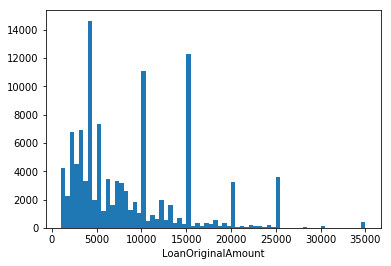

In [22]:
# Create hist with original loan amount.
bins = np.arange(1000, df_clean.LoanOriginalAmount.max() + 500, 500)

plt.hist(df_clean.LoanOriginalAmount, bins=bins)
plt.xlabel('LoanOriginalAmount');

Most loan amounts fell in the buckets divisible by $\$$1,000 and a significant portion of those were divisible by $\$$5,000. I'd expect the loan purpose to be a good predictor of whether or not the loan amount falls in one of these buckets.

Next, I'll be exploring `BorrowerRate`. I chose this instead of `BorrowerAPR` because the `BorrowerAPR` will be more affected by the loan term than the `BorrowerRate` would be.

In [23]:
# Describe the distribution of BorrowerRate.
df_clean.BorrowerRate.describe()

count    113066.000000
mean          0.192946
std           0.074917
min           0.000000
25%           0.134000
50%           0.184000
75%           0.250600
max           0.497500
Name: BorrowerRate, dtype: float64

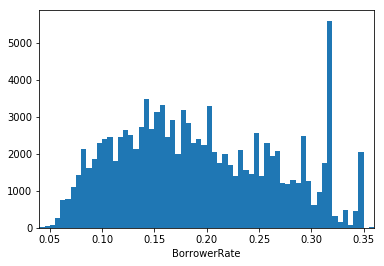

In [24]:
# Create hist with borrower interest rate.
bins = np.arange(0, df_clean.BorrowerRate.max()+0.005, 0.005)

plt.hist(df_clean.BorrowerRate, bins=bins)
plt.xlabel('BorrowerRate')
plt.xlim(0.04, 0.36);

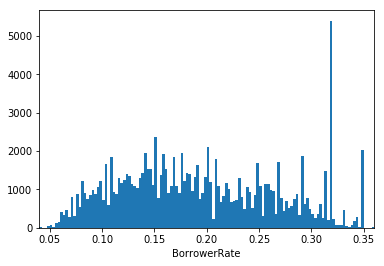

In [25]:
# Redo hist with more bins for a more detailed view.
bins = np.arange(0, df_clean.BorrowerRate.max()+0.0025, 0.0025)

plt.hist(df_clean.BorrowerRate, bins=bins)
plt.xlabel('BorrowerRate')
plt.xlim(0.04, 0.36);

In [26]:
# Check the 5 most common interest rates.
df_clean.BorrowerRate.value_counts().head()

0.3177    3672
0.3500    1905
0.3199    1651
0.2900    1508
0.2699    1314
Name: BorrowerRate, dtype: int64

In [27]:
print('Most common BorrowerRate: {}%'.format(df_clean.BorrowerRate.mode()[0]*100))
print('Number of loans at {}% interest rate: {}'.format(df_clean.BorrowerRate.mode()[0]*100, (df_clean.BorrowerRate == df_clean.BorrowerRate.mode()[0]).sum()))

Most common BorrowerRate: 31.77%
Number of loans at 31.77% interest rate: 3672


Although the `BorrowerRate` was tapering off as interest rates got higher, there was a large spike at 31.77% and another smaller spike at 35%. I'm guessing there was a surge in demand whenever the lender was offering these rates. I'll be exploring the relationship between `BorrowerRate` & `LoanOriginationDate` in the next section.

Now I'll explore my ordinal categorical variables: `ProsperCreditGrade`, `LoanStatus`, & `Term`.

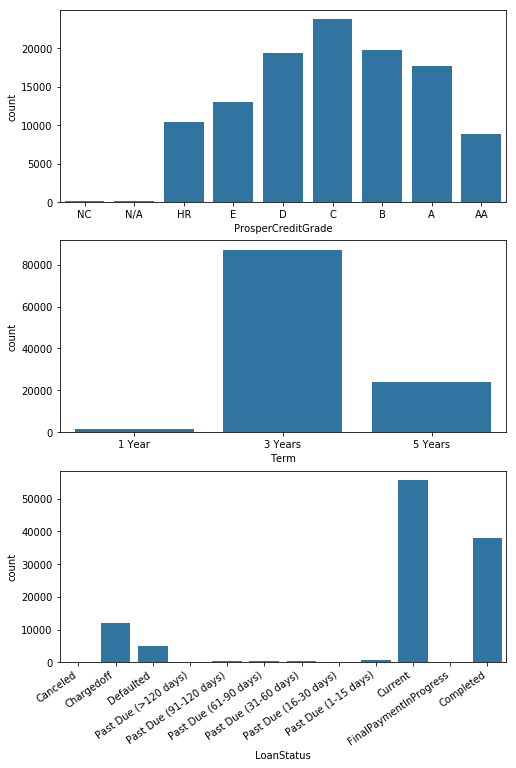

In [28]:
# Create bar charts for ProsperCreditGrade, LoanStatus, & Term.
fig, ax = plt.subplots(nrows=3, figsize=[8,12])
plt.subplots_adjust(hspace=0.2)
base_color = sns.color_palette()[0]

ax0 = sns.countplot(data=df_clean, x='ProsperCreditGrade', color=base_color, ax=ax[0])
ax1 = sns.countplot(data=df_clean, x='Term', color=base_color, ax=ax[1])
ax2 = sns.countplot(data=df_clean, x='LoanStatus', color=base_color, ax=ax[2])
ax2.set_xticklabels(ordinal_var_dict['LoanStatus'], rotation=35, ha='right');

Like school grades, the distribution for `ProsperCreditGrade` is unimodal around a C average. Very few people had a NC or N/A `ProsperCreditGrade`. The distribution for `LoanStatus` is about what you'd expect. The vast majority of loans fell into the "Current" or "Completed" categories with very few loans in each of the "Past Due" bins. The percentage of loans that were "Defaulted" on is pretty low, but only because many of them were "Chargedoff" and sent to a debt collector. The overwhelming majority of loans had a 3 year `Term`. This seems to be a happy medium between having a high payment on a short loan term and paying a lot of interest on a longer term loan.

Now that I've explored ordinal categorical variables, I'll look at non-ordered categories such as `BorrowerState`, `Occupation`, & `EmploymentStatus`.

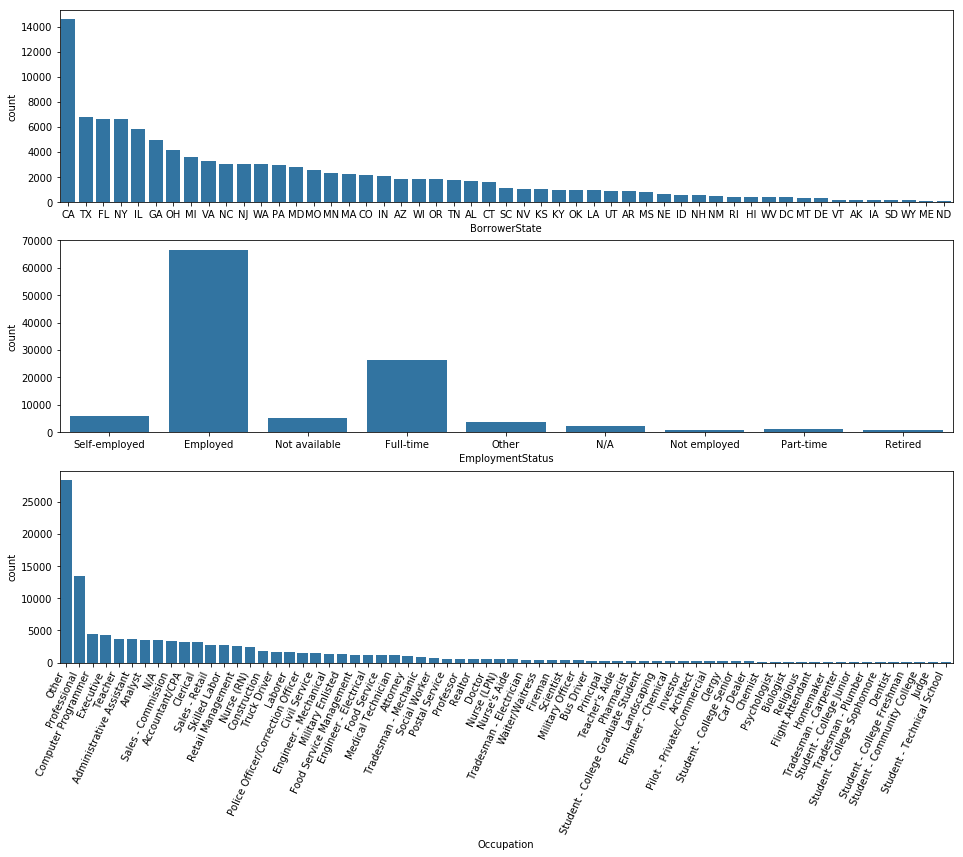

In [29]:
# Create bar charts for BorrowerState, Occupation, & EmploymentStatus.
fig, ax = plt.subplots(nrows=3, figsize=[16,12])

base_color = sns.color_palette()[0]
BorrowerState_ord = df_clean.BorrowerState.value_counts().index
Occupation_ord = df_clean.Occupation.value_counts().index

ax0 = sns.countplot(data=df_clean, x='BorrowerState', color=base_color, ax=ax[0], order=BorrowerState_ord)
ax1 = sns.countplot(data=df_clean, x='EmploymentStatus', color=base_color, ax=ax[1]);
ax2 = sns.countplot(data=df_clean, x='Occupation', color=base_color, ax=ax[2], order=Occupation_ord)
ax2.set_xticklabels(Occupation_ord, rotation=65, ha='right');

As you'd expect, there's a strong relationship between `BorrowerState` and state population. I'm interested in just how strong this relationship is, so I'll source a state population dataset to use in further analysis. `EmploymentStatus` is a kind of a mess with multiple "Employed" values to pick from. This makes it difficult to differentiate between "Employed" & "Full-time," but I'll see if I can find any differences in bivariate explorations of this variable. With the `Occupation` variable we can see that very few students took out loans compared to other occupations. There's a lot of possible values in this column, so it'd be hard to get a fair comparison of all of them. 

Next I'll be looking at `CreditScoreRangeLower` & `CreditScoreRangeUpper`.

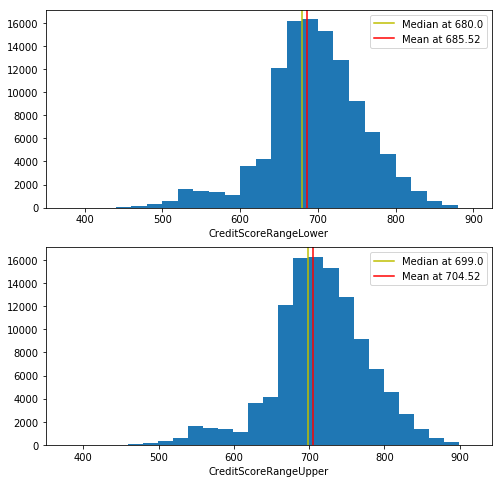

In [30]:
# Create hist charts for CreditScoreRangeLower & CreditScoreRangeUpper.
fig, ax = plt.subplots(nrows=2, figsize=[8,8])

variables = ['CreditScoreRangeLower', 'CreditScoreRangeUpper']

for i in range(len(variables)):
    var = variables[i]
    bins = np.arange(min(df_clean[var]), max(df_clean[var])+20, 20)
    ax[i].hist(df_clean[var], bins=bins, label=None)
    ax[i].set_xlim(350)
    ax[i].set_xlabel(var)
    ax[i].axvline(df_clean[var].median(), color='y', label='Median at {}'.format(round(df_clean[var].median(), 2)))
    ax[i].axvline(df_clean[var].mean(), color='r', label='Mean at {}'.format(round(df_clean[var].mean(), 2)))
    ax[i].legend()

In [31]:
# Display all non-zero CreditScores under 400.
with pd.option_context('display.max_rows', 1000):
    display(df_clean[(df_clean['CreditScoreRangeLower'] < 400)&(df_clean['CreditScoreRangeLower'] != 0)])

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors,OriginationYearMonth,OriginationYear,ProsperCreditGrade,ListingCategory,LogLoanOriginalAmount
112846,CD0F3365987359969F50347,34569,2006-08-27 15:26:07.623,HR,3 Years,Chargedoff,2008-11-04,0.28887,0.2695,0.2645,NaN,NaN,NaN,NaN,NaN,0,NaN,Other,Not available,NaN,True,True,6A3B336601725506917317E,2006-08-09 18:14:42.013,360.0,379.0,1984-11-27,NaN,NaN,36.0,2,290.0,2.0,13.0,2.0,NaN,24.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.19,Not displayed,True,6000.0,5EC33366524362823B6D748,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2073,26.0,90,3051,1000,2006-09-06,Q3 2006,F7773365555119350C11D08,40.8,836.8,451.66,385.14,-6.97,0.0,548.3,548.34,0.0,1.0,0,0,0.0,23,2006-09,2006,HR,Not Available,3.0


Here we can see that the `CreditScoreRange` columns are exactly the same shape. When comparing individuals in the dataset, their `Upper` scores are exactly 19 points higher than their `Lower` scores. This can also be seen by comparing the mean of each of the plots above. Using both of these scores is unnecessary, so I'll only be using `CreditScoreRangeUpper` in further analysis. There was only one loan where the borrower had a credit score less than 400. Everyone else under 400 had a falsely reported `CreditScoreRange` of 0-19 and a `CreditGrade` of NC. There were also 591 NaN values in the dataset, but I've chosen not to drop them since they still have a `PrsoperCreditGrade`.

Another big factor in determining a borrower’s eligibility is income. Individuals with a higher income should be able to make payments more easily, but do these people actually need loans? I'll visualize `StatedMonthlyIncome` below to find out. 

In [32]:
# Describe distribution of the log of StatedMonthlyIncome.
np.log10(df_clean.StatedMonthlyIncome.describe())

C:\Users\Ernest\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  


count    5.053332
mean     3.748585
std      3.874806
min          -inf
25%      3.505068
50%      3.669007
75%      3.834083
max      6.243039
Name: StatedMonthlyIncome, dtype: float64

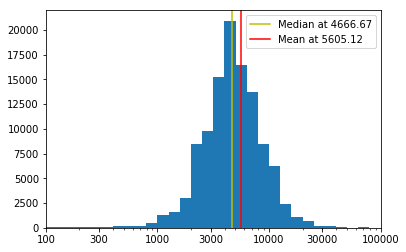

In [33]:
# Create hist chart with StatedMonthlyIncome on a log scale.
x_ticks = [100, 300, 1000, 3000, 10000, 30000, 100000]

log_bins = 10 ** np.arange(0, np.log10(df_clean.StatedMonthlyIncome.max())+0.1, 0.1)
plt.hist(df_clean.StatedMonthlyIncome, bins=log_bins, label=None)
plt.xscale('log')
plt.xticks(x_ticks, x_ticks)
plt.axvline(df_clean.StatedMonthlyIncome.median(), color='y', label='Median at {}'.format(round(df_clean.StatedMonthlyIncome.median(), 2)))
plt.axvline(df_clean.StatedMonthlyIncome.mean(), color='r', label='Mean at {}'.format(round(df_clean.StatedMonthlyIncome.mean(), 2)))
plt.xlim(100, 100000)
plt.legend();

When plotted on a log-scale, `StatedMonthlyIncome` has a unimodal distribution that's slightly skewed to the right. What's interesting is the median stated income of borrowers equates to $\$$56,000/year. This number is much higher than the median personal income in the US, which was only $\$$29,154 in 2014. This means that people with high income (or at least those that claim to have high income) are more likely to take out loans than the average American. 

Next, I'll see what the most popular `ListingCategories`/reasons were for taking out a loan.

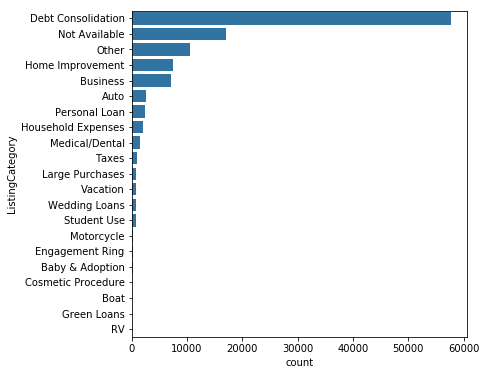

In [34]:
# Create horizontal bar chart for ListingCategory.
plt.figure(figsize=[6,6])
sns.countplot(data=df_clean, y='ListingCategory', color=base_color, order=df_clean.ListingCategory.value_counts().index);

Debt Consolidation was the most popular `ListingCategory` by far. I'd expect those borrowers to have different attributes than those that took out Home Improvement or Business loans.

The next variables I'll look at are `OriginationYearMonth` & `OriginationYear`.

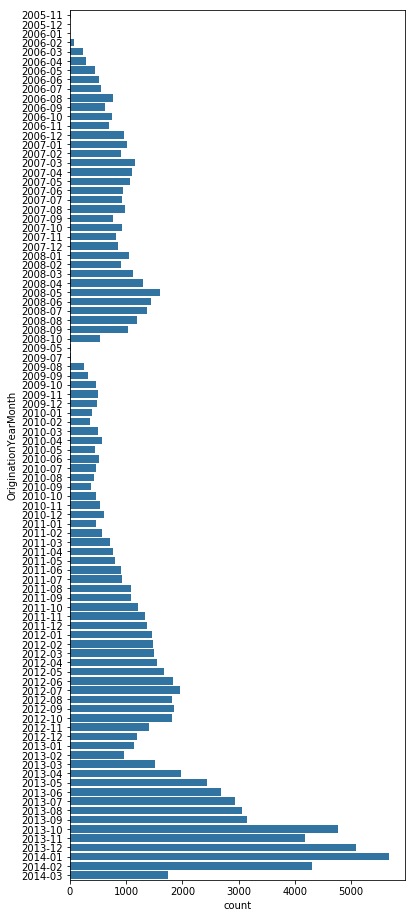

In [35]:
# Create bar chart for OriginationYearMonth.
plt.figure(figsize=[6,16])

order = df_clean.OriginationYearMonth.value_counts().sort_index().index

sns.countplot(y=df_clean.OriginationYearMonth, color=base_color, order=order);

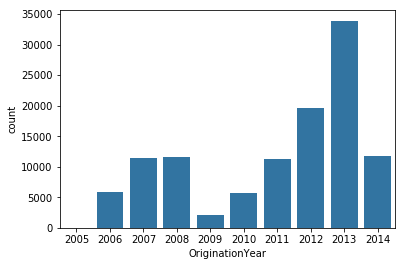

In [36]:
# Create bar chart for OriginationYear.
order = df_clean.OriginationYear.value_counts().sort_index().index

sns.countplot(x=df_clean.OriginationYear, color=base_color, order=order);

The number of loans originated each month was steadily climbing in the mid 2000's before dropping off a cliff in at the end of 2008. It wasn't until mid-way through 2012 that Prosper Loans got back to their pre-housing crisis volume, but once they did, they were able to double their monthly originations within a couple of years.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

The distribution of both `LoanOriginalAmount` & `BorrowerRate` were multimodal. The peaks for `LoanOriginalAmount` were every $\$$5,000 and the two largest peaks for `BorrowerRate` were at 31.77% & 35%. `BorrowerState` looked to be highly correlated with state population, so I'll be exploring that further later. No transformations were needed on my variables of interest.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

The only feature I investigated that had an unusual distribution was `StatedMonthlyIncome` which had a log-normal distribution. There were also a few features I cleaned up a bit before plotting. There were duplicates in the dataset that only differed in their `ProsperScore`, so the duplicate records were dropped along with the `ProsperScore` column. I then created a new column that combined both `ProsperRating (Alpha)` & `CreditGrade` into a single column I named `ProsperCreditGrade` so I could visualize ratings from before and after July 2009. Another column was created to convert `ListingCategory (Numeric)` into the corresponding string values and third & fourth columns called `OriginationYearhMonth` `OriginationYear` respectively, were made using the `LoanOriginationDate` column. The `Term` column was converted from months to years to better match the terminology used by most people. `ProsperCreditGrade`, `LoanStatus`, & `Term` were all converted to ordinal categorical dtype and `NaN` values were filled with "N/A" or equivalent for all features that were visualized. 

## Bivariate Exploration

In this section, I'll be investigating the relationships between pairs of variables in the Prosper Loans dataset. Due to limited time, I'll be cutting out some of the variables explored in the previous section.

First I'll be looking at correlations between features to see which ones I'd like to explore further.

In [37]:
# Create lists of numeric & categoric features.
numeric_vars = ['LoanOriginalAmount', 'BorrowerRate', 'CreditScoreRangeUpper', 'StatedMonthlyIncome']
categoric_vars = ['ProsperCreditGrade', 'Term', 'LoanStatus', 'EmploymentStatus', 'OriginationYear']

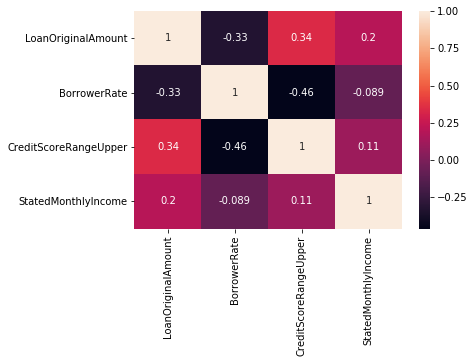

In [38]:
# Plot a heatmap of numeric_vars.
sns.heatmap(df_clean[numeric_vars].corr(), annot = True);

C:\Users\Ernest\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


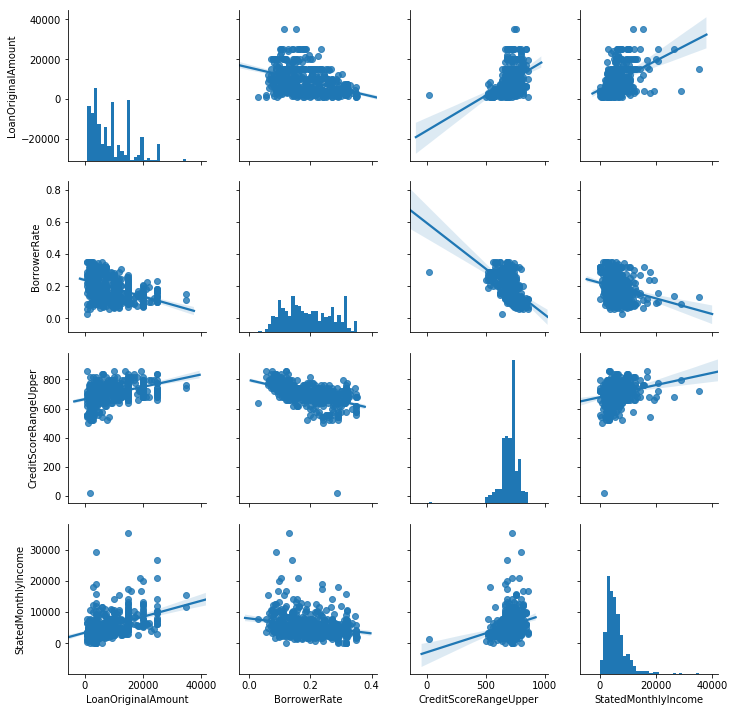

In [39]:
# Create a gridplot of numeric_vars.
sample = np.random.choice(df_clean.shape[0], 500, replace=False)
loan_sample = df_clean.loc[sample,:]

g = sns.PairGrid(loan_sample, vars = numeric_vars)
g = g.map_diag(plt.hist, bins=30)
g.map_offdiag(sns.regplot);

As seen in the heatmap & scatter matrix, moderate correlations are seen between `LoanOriginalAmount`, `BorrowerRate`, & `CreditScoreRangeUpper`. The correlation between `StatedMonthlyIncome` and the other variables was very weak, so I won't be exploring it any further. `CreditScoreRangeUpper` showed the strongest correlation with my features of interest. 

There weren't any surprises here. The higher a person's credit score, the lower their interest rate and the higher their loan amount was.

Now I'll explore how categorical variables correlate with `LoanOriginalAmount` & `BorrowerRate`.

In [40]:
# Define function for potting boxplots.
def boxgrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    default_color = sns.color_palette()[0]
    sns.boxplot(x, y, color=default_color)

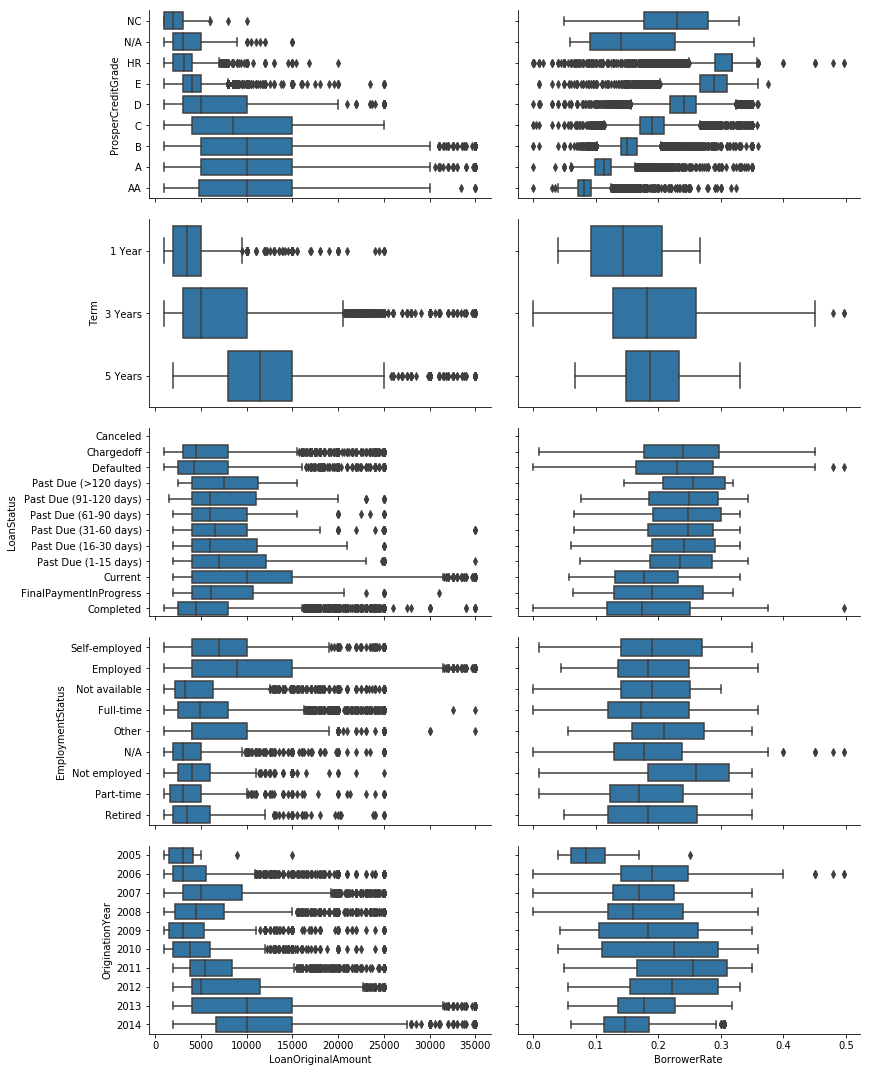

In [41]:
# Plot boxplots on a PairGrid.
g = sns.PairGrid(data=df_clean,  x_vars=['LoanOriginalAmount', 'BorrowerRate'], y_vars=categoric_vars,
                 height=3, aspect=1.8)
g.map(boxgrid);

Similar to what was seen with `CreditScoreRangeUpper`, `ProsperCreditGrade` was the best predictor of `LoanOriginalAmount` & `BorrowerRate`. The better the borrower's credit grade, the better the terms of their loan. The second best predictor was the loan `Term` where longer terms received both higher loan amounts and higher interest rates. The reason for this trend is that a longer term stretches the cost of the loan out over time, both increasing risk for the lender (higher interest rate) and making payments lower for the borrower which makes them eligible for a higher loan amount.

Looking at `LoanStatus`, it appears that loans that either go past due, get defaulted on, or are charged off have lower loan amounts and higher interest rates on average than those that are current. I would guess that these borrowers have worse loan terms because they were high risk borrowers to begin with.

Grouping by `OriginationYear` shows that loan amounts were on the rise until the economy took a turn in 2008. After bottoming out in 2009, they've steadily risen over time and a new maximum loan amount was established in 2013. The relationship between `OriginationYear` and interest rate isn't as predictable, but appears to be inversely related to `LoanOriginalAmount`.

The labeling was inconsistent in the `EmploymentStatus` column, so I'll be excluding it from further analysis.

Now that we've looked at correlations between numerical variables and how our features of interest relate to categorical variables, let's take a look at relationships between categories.

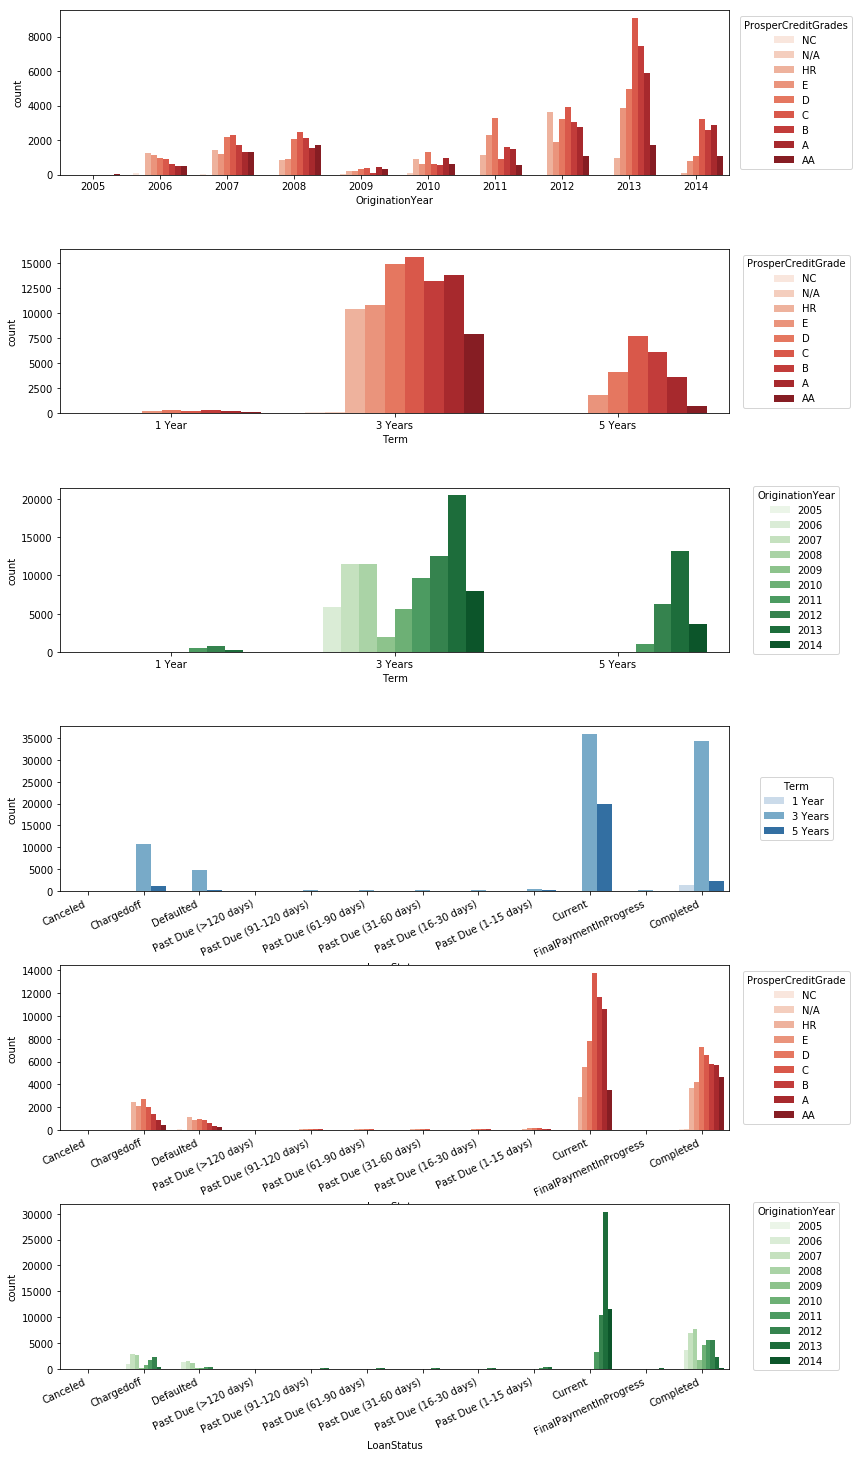

In [42]:
# Plot categroical variables against each other.
plt.figure(figsize = [12, 25])
plt.subplots_adjust(hspace=0.45)

ax = plt.subplot(6, 1, 1)
sns.countplot(data=df_clean, x='OriginationYear', hue='ProsperCreditGrade', palette='Reds')
ax.legend(title='ProsperCreditGrades', loc='center', ncol=1, bbox_to_anchor=(1.1, 0.5))

ax = plt.subplot(6, 1, 2)
sns.countplot(data=df_clean, x='Term', hue='ProsperCreditGrade', palette='Reds')
ax.legend(title='ProsperCreditGrade', loc=10, bbox_to_anchor=(1.1, 0.5))

ax = plt.subplot(6, 1, 3)
sns.countplot(data=df_clean, x='Term', hue='OriginationYear', palette='Greens')
ax.legend(title='OriginationYear', loc=10, bbox_to_anchor=(1.1, 0.5))

ax = plt.subplot(6, 1, 4)
sns.countplot(data=df_clean, x='LoanStatus', hue='Term', palette='Blues')
ax.legend(title='Term', loc=10, bbox_to_anchor=(1.1, 0.5))
ax.set_xticklabels(ordinal_var_dict['LoanStatus'], rotation=25, ha='right')

ax = plt.subplot(6, 1, 5)
sns.countplot(data=df_clean, x='LoanStatus', hue='ProsperCreditGrade', palette='Reds')
ax.set_xticklabels(ordinal_var_dict['LoanStatus'], rotation=25, ha='right');
ax.legend(title='ProsperCreditGrade', loc='center', ncol=1, bbox_to_anchor=(1.1, 0.5))

ax = plt.subplot(6, 1, 6)
sns.countplot(data=df_clean, x='LoanStatus', hue='OriginationYear', palette='Greens')
ax.set_xticklabels(ordinal_var_dict['LoanStatus'], rotation=25, ha='right')
ax.legend(title='OriginationYear', loc='center', ncol=1, bbox_to_anchor=(1.1, 0.5));

Prosper's lending style changed quite a bit over the years. As seen in the first plot, they started off primarily as a subprime lender, but began to originate less high risk loans until the housing crisis in 2008. When they came back in 2009, they leaned towards subprime lending again, but began favoring borrowers with good credit in 2013. I expect this shift came after defaults started to pile up for higher risk loans as seen in plots 5 & 6. 

In the 2nd plot comparing `ProsperCreditGrade` & `Term`, you can see that all borrowers with NC or HR credit grades had a 3 Year term on their loan. I suspect this is due to different lending guidelines for 1 & 5 Year loan products since Prosper continues to lend to HR borrowers. Despite adding new loan products in 2011, the bulk of Prosper's lending continues to be loans with a 3 Year term. There was a small shift towards 5 Year terms when Prosper started shifting towards higher credit grades, but I expect 3 Year loans will continue to be the bread and butter for this company.

Now that I have a good idea of how these features relate to one another, there's a couple from the scatter matrix I made earlier that I'd like to get a better look at. Instead of visualizing a small subset of the data, I'll plot `CreditScoreRangeUpper` vs `BorrowerRate` & `CreditScoreRangeUpper` vs `LoanOriginalAmount` on a log scale.

In [43]:
# Function to calculate correlation coefficient between two columns of a DataFrame.
    # Adapted from https://stackoverflow.com/questions/30942577/seaborn-correlation-coefficient-on-pairgrid
def corr(data, x, y, xy=(1.02, 0.90), **kwargs):
    '''
    Takes a DataFrame (data) and two numeric variables (x and y) and annotates the current ax with their correlation
    coefficient. 
    
    xy: Use to change position of annotation.
    '''
    # Calculate the value
    coef = data[[x,y]].corr().iloc[0,1]
    
    # Make the label
    label = r'$\rho$ = ' + str(round(coef, 2))
    
    # Add the label to the plot
    ax = plt.gca()
    ax.annotate(label, xy=xy, size=20, xycoords=ax.transAxes)

C:\Users\Ernest\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


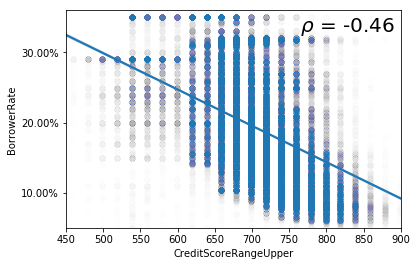

In [44]:
# Create a regplot for BorrowerRate vs CreditScoreRangeUpper & annotate with correlation coefficient.
ax = sns.regplot(data=df_clean, x='CreditScoreRangeUpper', y='BorrowerRate', scatter_kws={'alpha':0.005})

plt.xlim(450, 900)
plt.xlabel('CreditScoreRangeUpper')

locs, labels = plt.yticks()

plt.yticks(locs, ['{:.2%}'.format(x) for x in locs])
plt.ylim(0.05, 0.36)
plt.ylabel('BorrowerRate');
corr(df_clean, 'CreditScoreRangeUpper', 'BorrowerRate', xy=(0.7, 0.9))

C:\Users\Ernest\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


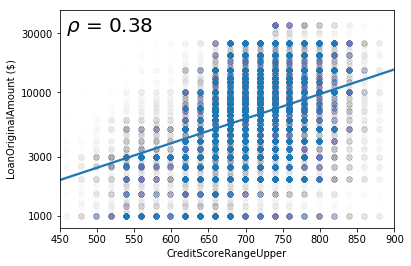

In [45]:
# Create a regplot for LogLoanOriginalAmount vs CreditScoreRangeUpper & annotate with correlation coefficient.
ax = sns.regplot(data=df_clean, x='CreditScoreRangeUpper', y='LogLoanOriginalAmount', scatter_kws={'alpha':0.005})

y_labels = [1000, 3000, 10000, 30000]

plt.xlim(450, 900)
plt.xlabel('CreditScoreRangeUpper')

plt.ylim(np.log10(800))
plt.yticks(np.log10(y_labels), y_labels)
plt.ylabel('LoanOriginalAmount ($)');
corr(df_clean, 'CreditScoreRangeUpper', 'LogLoanOriginalAmount', xy=(0.02, 0.9))

As seen above, there is a moderate negative correlation between `CreditScoreRangeUpper` and `BorrowerRate`. The linear relationship here is very apparent, so transformations weren't necessary. However, for the 2nd plot with `CreditScoreRangeUpper` and `LoanOriginalAmount`, I performed a log transformation on `LoanOriginalAmount` to get a better fit. In doing this, the $\rho$ value was increased from 0.34 to 0.38.

Next, I'll re-examine categorical features with `LogLoanOriginalAmount`.

In [46]:
# Remove EmploymentStatus from categoric_vars
categoric_vars.remove('EmploymentStatus')

C:\Users\Ernest\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log10
  import sys


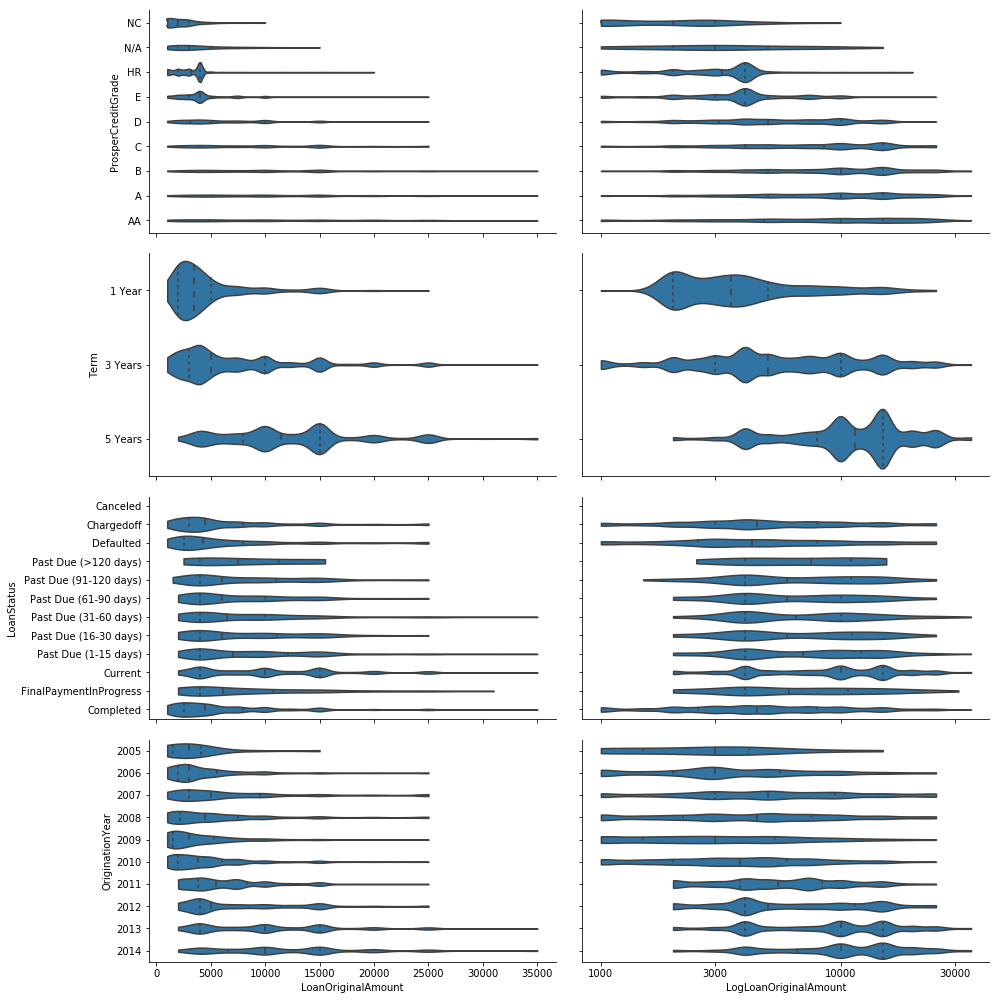

In [47]:
# Create a PairGrid plotting LoanOriginalAmount & LogLoanOriginalAmount against categoric_vars.
x_labels = [0, 1000, 3000, 10000, 30000]

g = sns.PairGrid(data=df_clean,  x_vars=['LoanOriginalAmount', 'LogLoanOriginalAmount'], y_vars=categoric_vars,
                 height=3.5, aspect=1.8)

g.axes[3,1].set_xticks(np.log10(x_labels))
g.axes[3,1].set_xticklabels(x_labels)

g.map(sns.violinplot, inner='quartile', cut=0);

Graphing on a log scale and using violin plots instead of box plots made spotting trends in the dataset a much easier. From the first plot, we can see that the majority of NC, N/A, HR, & E loans have loan amounts of $\$$5,000 or lower, while borrowers with better credit have a much wider distribution. The loan `Term` plot shows that 75% of 1 year terms had loan amounts that were $\$$5,000 or less, 3 year terms had 75% at $\$$10,000 or less, and 5 year terms had more than half of their loans over $\$$10,000. Not much is gained by plotting against `LoanStatus`, but looking at `OriginationYear`, you can see a very clear shift towards higher loan amounts in 2011 when the minimum loan amount was raised. The trend continues in 2013 & 2014 where the maximum loan amount was raised and a smaller proportion of loans had low loan amounts.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

It comes as no surprise that `BorrowerRate` & `CreditScoreRangeUpper`had the strongest correlation out of all features plotted. The main reason people care about their credit score in the first place is because of the lower interest rates they can get with a high score. The relationship between `LoanOriginalAmount` & `CreditScoreRangeUpper` was less apparent, but ploting `LoanOriginalAmount` on a log scale made the trend easier to notice. The reason that `LoanOriginalAmount` has a weaker relationship with `CreditRangeScoreUpper` than `BorrowerRate` does is because borrowers with high credit scores don't always want a higher loan amount, whereas a high credit score almost always comes with a lower interest rate.

When plotted against the categorical variables, we can see that both `LoanOriginalAmount` & `BorrowerRate` went up as the loan `Term` went up. This is in contrast to every other categorical variable where loan amount & interest rate seemed to be negatively correlated.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

In the categorical plots, perhaps the most interesting was of `ProsperCreditGrade` grouped by `OriginationYear`. This graph shows how Prosper Loans' lending footprint changed over the years. They went from high risk in 2006, to more conservative in 2008 before starting the cycle over again when the housing market crashed. You can also see in the 5th categorical plot that `ProsperCreditGrade` was a very strong predictor of `LoanStatus`. Higher risk borrowers with a D or lower were over represented in the Chargedoff & Defaulted categories and underrepresented in the Current & Completed categories.

## Prepare State Data
Before starting on my multivariate exploration, I'll create a DataFrame to be used in my analysis of `BorrowerState`. To do this, I'll also need to add population data from [census.gov](https://www2.census.gov/programs-surveys/popest/datasets/2010-2018/national/totals/nst-est2018-alldata.csv).

In [48]:
# Create df with number of loans in each state grouped by year.
df_map = pd.DataFrame(df_clean.groupby('OriginationYear').BorrowerState.value_counts()).copy()

In [49]:
# Rename BorrowerState to Count.
df_map.rename(columns={'BorrowerState':'Count'}, inplace=True)

In [50]:
# Reset index, making BorrowerState & OriginationYear into columns.
df_map.reset_index(inplace=True)

In [51]:
# Pivot table so that each year has a column.
df_map = df_map.pivot('BorrowerState', 'OriginationYear', 'Count')

In [52]:
# Make columns strings instead of DateTime, so that additional columns can be added.
df_map.columns = map(str, df_map.columns)

In [53]:
# Create column with Total counts for each state.
df_map['Total'] = df_map.sum(axis=1)

In [54]:
# Add State Code as a column.
df_map['State Code'] = df_map.index

In [55]:
# US State Code dictionary for creating a state name column.
us_state_abbrev = {
        'AK': 'Alaska',
        'AL': 'Alabama',
        'AR': 'Arkansas',
        'AS': 'American Samoa',
        'AZ': 'Arizona',
        'CA': 'California',
        'CO': 'Colorado',
        'CT': 'Connecticut',
        'DC': 'District of Columbia',
        'DE': 'Delaware',
        'FL': 'Florida',
        'GA': 'Georgia',
        'GU': 'Guam',
        'HI': 'Hawaii',
        'IA': 'Iowa',
        'ID': 'Idaho',
        'IL': 'Illinois',
        'IN': 'Indiana',
        'KS': 'Kansas',
        'KY': 'Kentucky',
        'LA': 'Louisiana',
        'MA': 'Massachusetts',
        'MD': 'Maryland',
        'ME': 'Maine',
        'MI': 'Michigan',
        'MN': 'Minnesota',
        'MO': 'Missouri',
        'MP': 'Northern Mariana Islands',
        'MS': 'Mississippi',
        'MT': 'Montana',
        'NA': 'National',
        'NC': 'North Carolina',
        'ND': 'North Dakota',
        'NE': 'Nebraska',
        'NH': 'New Hampshire',
        'NJ': 'New Jersey',
        'NM': 'New Mexico',
        'NV': 'Nevada',
        'NY': 'New York',
        'OH': 'Ohio',
        'OK': 'Oklahoma',
        'OR': 'Oregon',
        'PA': 'Pennsylvania',
        'PR': 'Puerto Rico',
        'RI': 'Rhode Island',
        'SC': 'South Carolina',
        'SD': 'South Dakota',
        'TN': 'Tennessee',
        'TX': 'Texas',
        'UT': 'Utah',
        'VA': 'Virginia',
        'VI': 'Virgin Islands',
        'VT': 'Vermont',
        'WA': 'Washington',
        'WI': 'Wisconsin',
        'WV': 'West Virginia',
        'WY': 'Wyoming'
}

In [56]:
# Make column with state names.
df_map['State'] = df_map['State Code'].map(us_state_abbrev)

In [57]:
# Load US Census dataset.
df_state_pop = pd.read_csv('./data/census_data_2018.csv')

In [58]:
# Rename NAME & POPESTIMATE2014 columns.
df_state_pop.rename(columns={'NAME':'State',
                             'POPESTIMATE2014':'Population'}, inplace=True)

In [59]:
# Remove unnecessary columns.
df_state_pop = df_state_pop[['State','Population']]

In [60]:
# Inner join df_map & df_state_pop on State.
df_map = df_map.merge(df_state_pop, on='State')

In [61]:
# Add commas to Population column.
df_map['Formatted Population'] = df_map['Population'].map('{:,.2f}'.format).str[:-3]

In [62]:
# Initialize text column.
df_map['Text'] = ''

# Loop through each record and append yearly loan count & total to the Text column.
for i in range(len(df_map)):
    df_map['Text'].iloc[i]+='Population: '+df_map['Formatted Population'].iloc[i]+'<br>'
    
    if not np.isnan(df_map['2006'].iloc[i]):
        df_map['Text'].iloc[i]+='         2006: '+df_map['2006'].iloc[i].astype(int).astype(str)+'<br>'

    if not np.isnan(df_map['2007'].iloc[i]):
        df_map['Text'].iloc[i]+='         2007: '+df_map['2007'].iloc[i].astype(int).astype(str)+'<br>'
 
    if not np.isnan(df_map['2008'].iloc[i]):
        df_map['Text'].iloc[i]+='         2008: '+df_map['2008'].iloc[i].astype(int).astype(str)+'<br>'
 
    if not np.isnan(df_map['2009'].iloc[i]):
        df_map['Text'].iloc[i]+='         2009: '+df_map['2009'].iloc[i].astype(int).astype(str)+'<br>'
 
    if not np.isnan(df_map['2010'].iloc[i]):
        df_map['Text'].iloc[i]+='         2010: '+df_map['2010'].iloc[i].astype(int).astype(str)+'<br>'
 
    if not np.isnan(df_map['2011'].iloc[i]):
        df_map['Text'].iloc[i]+='         2011: '+df_map['2011'].iloc[i].astype(int).astype(str)+'<br>'
 
    if not np.isnan(df_map['2012'].iloc[i]):
        df_map['Text'].iloc[i]+='         2012: '+df_map['2012'].iloc[i].astype(int).astype(str)+'<br>'
 
    if not np.isnan(df_map['2013'].iloc[i]):
        df_map['Text'].iloc[i]+='         2013: '+df_map['2013'].iloc[i].astype(int).astype(str)+'<br>'
        
    if not np.isnan(df_map['2014'].iloc[i]):
        df_map['Text'].iloc[i]+='         2014: '+df_map['2014'].iloc[i].astype(int).astype(str)+'<br>'
 
    if not np.isnan(df_map['Total'].iloc[i]):
        df_map['Text'].iloc[i]+='         Total: '+df_map['Total'].iloc[i].astype(int).astype(str)
        
df_map['Text'].head()

C:\Users\Ernest\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


0    Population: 736,307<br>         2006: 2<br>   ...
1    Population: 4,842,481<br>         2006: 71<br>...
2    Population: 2,967,726<br>         2006: 6<br> ...
3    Population: 6,733,840<br>         2006: 69<br>...
4    Population: 38,625,139<br>         2006: 503<b...
Name: Text, dtype: object

In [63]:
# Initialize Population Text column.
df_map['Population Text'] = ''

# Loop through each record and append population to Population Text column.
for i in range(len(df_map)):
    df_map['Population Text'].iloc[i]+='Population: '+df_map['Formatted Population'].iloc[i]
    
df_map['Population Text'].head()

C:\Users\Ernest\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


0       Population: 736,307
1     Population: 4,842,481
2     Population: 2,967,726
3     Population: 6,733,840
4    Population: 38,625,139
Name: Population Text, dtype: object

In [64]:
# Set index of df_map to values in the State column.
df_map.set_index('State', inplace=True)

In [65]:
# Save cleaned dataset for Explanatory notebook.
df_map.to_csv('./data/prosper_map_data.csv')

## Multivariate Exploration

In this section I'll look at the relationships that different categories have with `LoanOriginalAmount` & `BorrowerRate` and I'll also compare state population with the number of loans in each state.

To get started, I'll plot `LogLoanOriginalAmount` vs `BorrowerRate` with a different color for each loan `Term`.

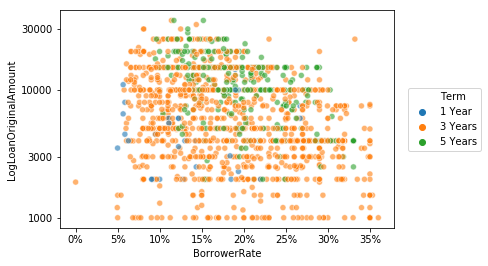

In [66]:
# Plot LogLoanOriginalAmount vs BorrowerRate, using a different color for each loan Term.
sample = np.random.choice(df_clean.shape[0], 1500, replace=True)
sample_set = df_clean.loc[sample,:]

y_labels = [1000, 3000, 10000, 30000]

sns.scatterplot(data=sample_set, x='BorrowerRate', y='LogLoanOriginalAmount', hue='Term', alpha=0.6)

plt.yticks(np.log10(y_labels), y_labels)
plt.gca().set_xticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_xticks()]) 
plt.legend(loc=10, bbox_to_anchor=(1.15,0.5));

The flexibility of a 3 year loan makes it a great option for most borrowers. The loan amounts and interest rates for this `Term` have a very wide range of possible values, while 1 year terms generally had lower loan amounts and low to moderate interest rates. Initially I was surprised to see that 5 year loans leaned towards lower interest rates, however when you look back at the distribution of `ProsperCreditGrades` for 5 year loans it all makes sense. Since these loans are only available to borrowers with an E or above, they won't have interest rates at the extreme high end like you see for low credit borrowers on 3 year loans.

In my 2nd plot, I'll use the same numeric variables, but grouped by `OriginationYear` instead of `Term`.

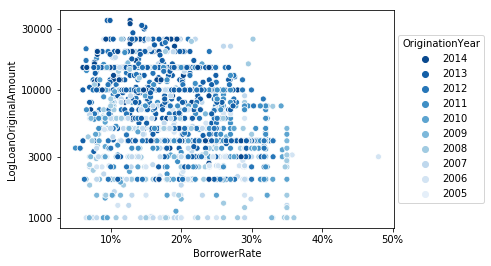

In [67]:
# Plot LogLoanOriginalAmount vs BorrowerRate, using a different color for each OriginationYear.
sample = np.random.choice(df_clean.shape[0], 1500, replace=True)
sample_set = df_clean.loc[sample,:]

y_labels = [1000, 3000, 10000, 30000]

sns.scatterplot(data=sample_set, x='BorrowerRate', y='LogLoanOriginalAmount', hue='OriginationYear', 
                alpha=1, palette='Blues')

plt.gca().set_xticklabels('{:.0f}%'.format(x*100) for x in plt.gca().get_xticks())
plt.yticks(np.log10(y_labels), y_labels)

handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles[-1:0:-1], labels[-1:0:-1], loc=10, title='OriginationYear', bbox_to_anchor=(1.14, 0.5));

The darker points on this scatterplot represent loans from recent years while the lighter points represent older loans. The darker points being clustered in the upper left quadrant makes the trend towards higher loan amounts and lower interest rates quite clear.

For more detail, I'll plot a total 29 scatterplots for `LogLoanOriginalAmount` vs `BorrowerRate` by faceting in two directions. I'll use columns for each `Term`, rows for each `ProsperCreditGrade`, and a different color for each `OriginationYear`.

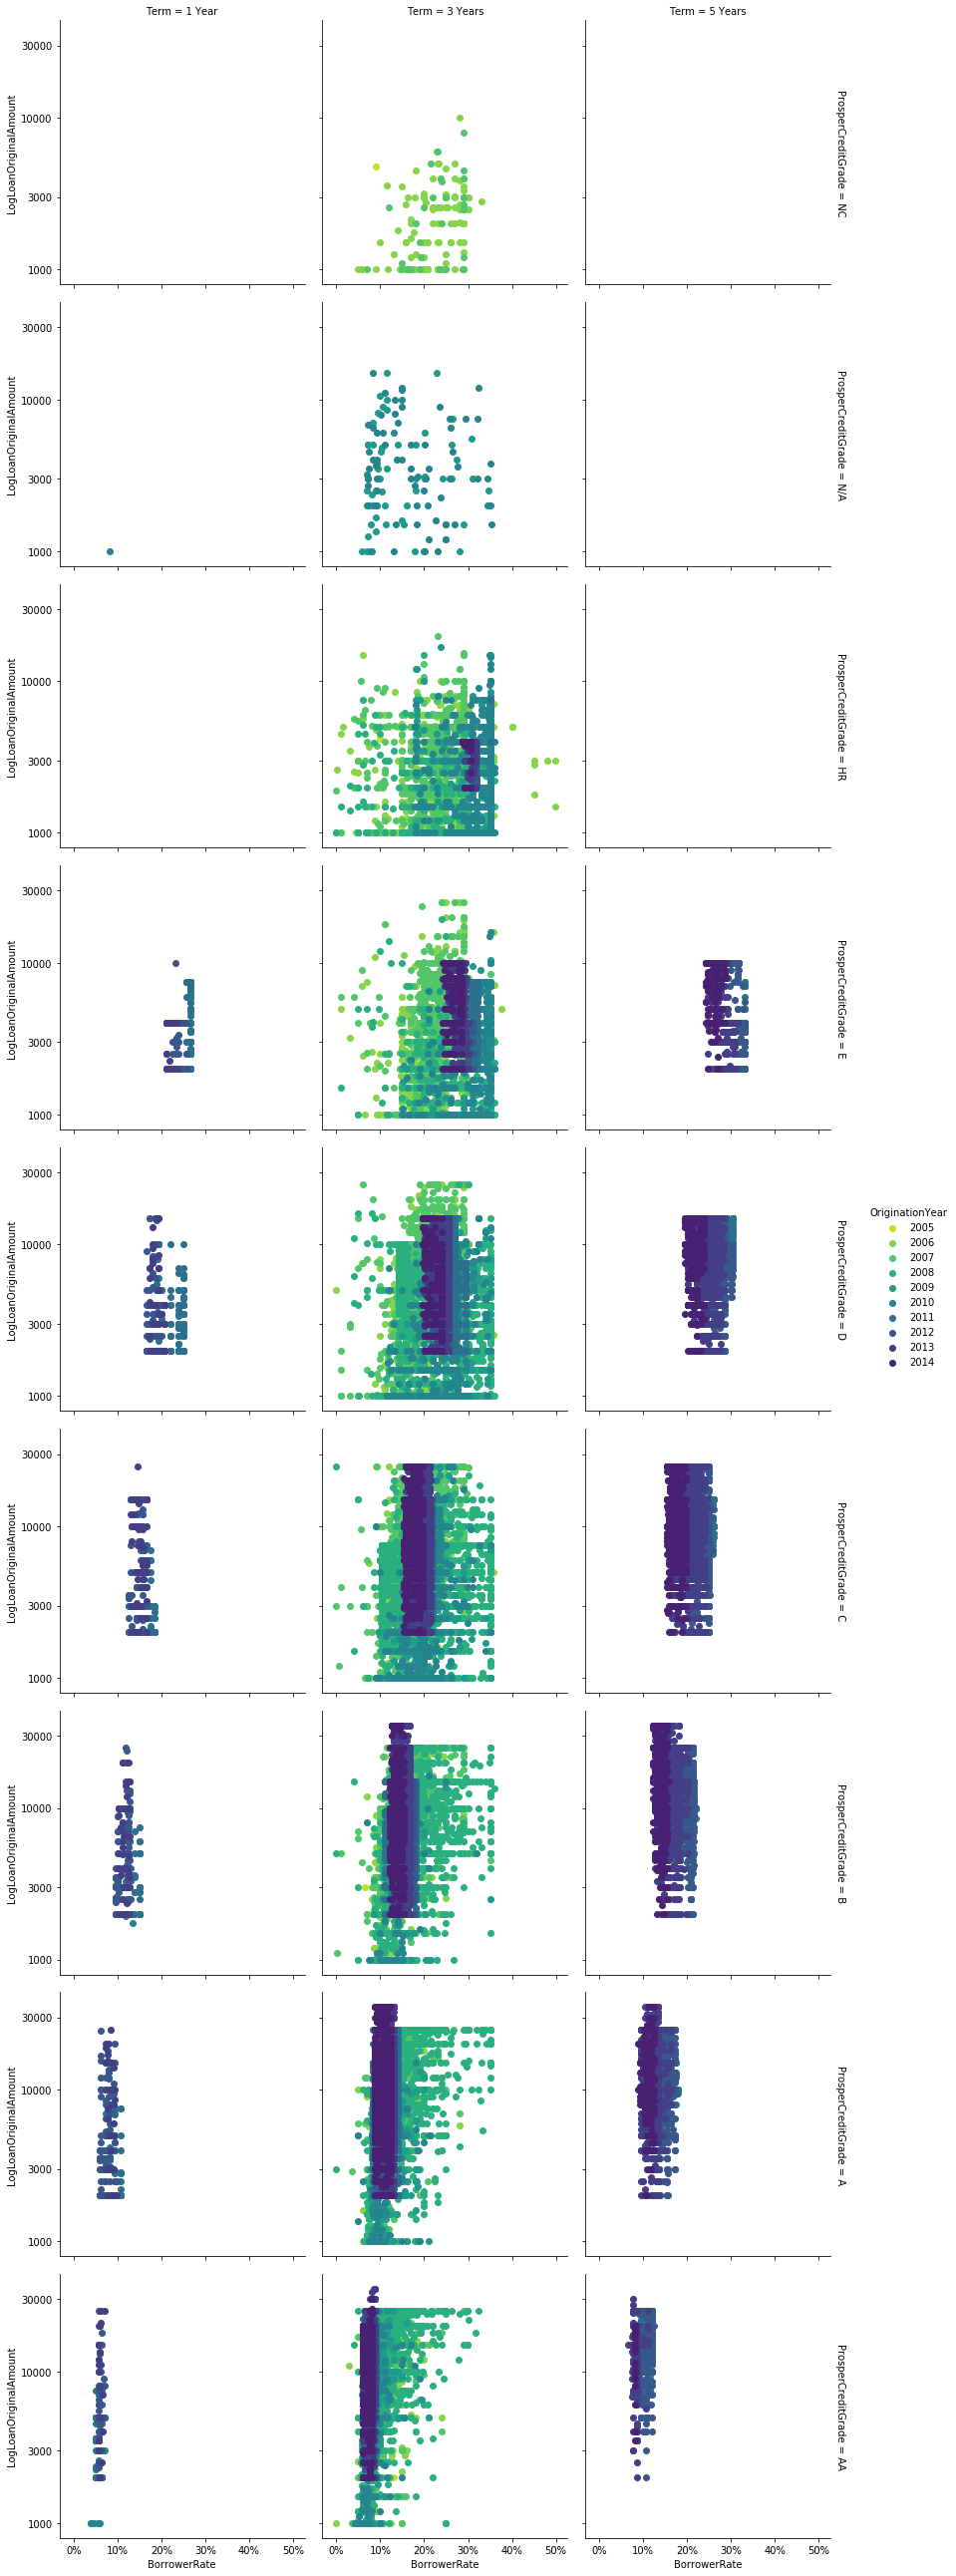

In [68]:
# Create FacetGrid with 29 scatterplots of LogLoanOriginalAmount & BorrowerRate with subplots for each Term &
    # ProsperCreditGrade with colors for each OriginationYear.
y_labels = [1000, 3000, 10000, 30000]

g = sns.FacetGrid(data=df_clean, col='Term', row = 'ProsperCreditGrade', hue='OriginationYear', height=4,
                margin_titles=True, palette='viridis_r', legend_out=True)
g.map(plt.scatter, 'BorrowerRate', 'LogLoanOriginalAmount', alpha=1)

for ax in g.axes[:,0]:
    ax.set_yticks(np.log10(y_labels))
    ax.set_yticklabels(y_labels)

for ax in g.axes[-1,:]:
    ax.set_xticklabels(['{:.0f}%'.format(x*100) for x in ax.get_xticks()]) 

g.add_legend();

There's a lot going on in these plots, but once you wrap your head around what's being shown, it makes spotting trends in the data very easy. The first trend you'll likely notice is how interest rates changed over time. The loans from earlier years had much wider ranges of possible interest rates, while loans in more recent years formed narrow bands of interest rates. You can also see that the lender became more conservative with their lending guidelines as time went on. Paying attention to more recent years, you'll notice that NC & N/A loans are no longer offered and they significantly reduced the number of HR loans that they originate. Not only were there less loans originated for risky borrowers, but the maximum loan amount was reduced for borrowers in these groups as well. For borrowers with an HR `ProsperCreditGrade`, $\$$4,000 became the maximum loan amount, $\$$10,000 was the maximum for E borrowers, $\$$15,000 for D borrowers, $\$$25,000 for C borrowers, and $\$$35,000 for B and above. However, for a 1 Year `Term` the maximum loan amount was only $\$$25,000 for borrowers with a B or higher.

The next feature I'd like to explore is how Average `BorrowerRate` changed over time by plotting against `OriginationYear` with different colors for each `ProsperCreditGrade`.

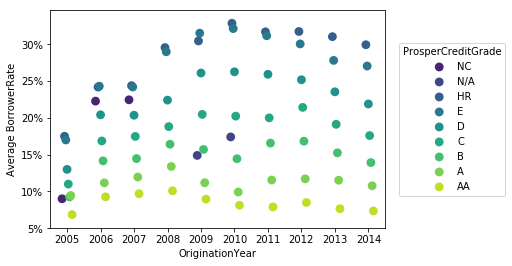

In [69]:
# Plot Average BorrowerRate vs OriginationYear, using a different color for each ProsperCreditGrade.
sns.pointplot(data=df_clean, x='OriginationYear', y='BorrowerRate', hue='ProsperCreditGrade', dodge=0.3, 
              linestyles='', palette='viridis', ci=None)

plt.ylabel('Average BorrowerRate')
plt.gca().set_yticklabels('{:.0f}%'.format(x*100) for x in plt.gca().get_yticks())
plt.legend(title='ProsperCreditGrade', loc=10, bbox_to_anchor=(1.2, 0.5));

In [70]:
# Calculate increase in BorrowerRate from 2005 to 2014.
percent_increase = (df_clean[df_clean.OriginationYear == '2014'].groupby('ProsperCreditGrade').BorrowerRate.mean() - \
                    df_clean[df_clean.OriginationYear == '2005'].groupby('ProsperCreditGrade').BorrowerRate.mean()) * 100

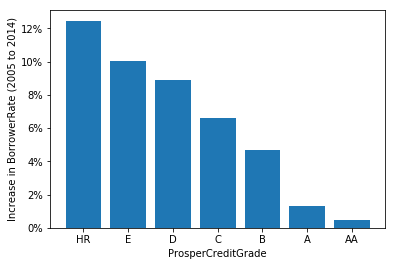

In [71]:
# Plot increase in BorrowerRate between 2005 & 2014.
plt.bar(percent_increase.index, percent_increase.values)
plt.gca().set_yticklabels('{:.0f}%'.format(x) for x in plt.gca().get_yticks())
plt.ylabel('Increase in BorrowerRate (2005 to 2014)')
plt.xlabel('ProsperCreditGrade');

Here we see Prosper Loans become more risk-averse over the years. The interest rates for low credit borrowers went up the most between 2005 & 2014, while those in the moderate range went up slightly less and those with good credit saw a very small increase of 0.5-1.3%. Considering the number of loans that were defaulted on by borrowers with poor credit, the steep increase in interest rate makes a lot of sense. In order for Prosper Loans to still be profitable for their high risk borrowers, they had to raise interest rates more to offset their losses.

After skipping `BorrowerState` in my bivariate visualizations, I'll revisit my 3rd feature of interest with a clustered bar chart. The y-axis on the left will have value counts for each `BorrowerState` and the population of each state will be on the right.

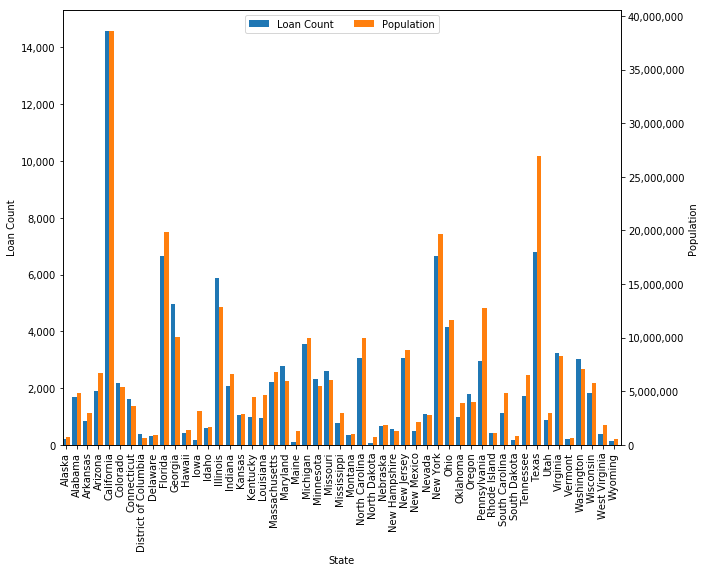

In [72]:
# Create clustered bar chart with Loan Count & Population for each state.
fig = plt.figure(figsize=[10,8])

ax = fig.add_subplot(111)
ax2 = ax.twinx()

width = 0.4

df_map['Total'].plot(kind='bar', x='State', sharex=True, color=sns.color_palette()[0], ax=ax, width=width, position=1)
df_map['Population'].plot(kind='bar', x='State', color=sns.color_palette()[1], ax=ax2, width=width, position=0)

ax.set_ylabel('Loan Count')
ax2.set_ylabel('Population')

ax.set_yticklabels(['{:,.2f}'.format(x)[:-3] for x in ax.get_yticks()])
ax2.set_yticklabels(['{:,.2f}'.format(x)[:-3] for x in ax2.get_yticks()])

lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, ['Loan Count'] + ['Population'], loc=9, ncol=2);

In [73]:
# Find correlation coefficient for State Population & Loan Count.
Latex((r"$\rho$ = {}".format(round(df_map[['Total','Population']].corr().iloc[0,1], 2))))

<IPython.core.display.Latex object>

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

The first plot gave me some idea of how loan amount & interest rates differed between different loan terms and the second showed me how the distribution of loan amount & interest rate changed over time. However, plotting it all together with `ProsperCreditGrade` made it much easier to spot trends in the data. The first 2 plots also suffered from having a small sample size, whereas the FacetGrid was big enough to plot all data points without much issue. The pointplot tracking the average `BorrowerRate` for each `ProsperCreditGrade` shows that it really pays to have good credit. The higher risk groups saw the greatest fluctuation in loan `BorrowerRate`, while interest rates remained relatively stable for borrowers with good credit. In the final plot depicting the loan count & population for each `BorrowerState`, there was a very strong correlation between these two features.

### Were there any interesting or surprising interactions between features?

While I could tell in my bivariate plots that Prosper Loans was becoming more conservative in their lending policies, I wasn't expecting the maximum loan amount for HR borrowers to as low as it was by 2014. I also expected to see interest rates increase evenly for all `ProsperCreditGrades`, but it makes sense when you see how high the default rates were for higher risk borrowers. There wasn't anything too surprising in my last plot, but I'm curious why states such as Iowa have a much lower proportion of loans.

## Plotly Choropleth Maps
In the section below, I'll utilize the Plotly graphing library to generate Choropleth maps of the US. The first map will depict state populations & the 2nd will have the number of loans originated in each `BorrowerState`. When moused over, the 2nd map will show a breakdown of loans by `OriginationYear`.

In [74]:
# Import plotly.
import plotly as py
import plotly.graph_objs as go
import plotly.figure_factory as ff

# Initialize pyplot in offline mode.
py.offline.init_notebook_mode(connected=True)

In [75]:
# Create scale for colorbar.
scl = [[0.0, 'rgb(218,218,235)'],[0.1, 'rgb(220,208,212)'],[0.2, 'rgb(223,198,189)'],[0.3, 'rgb(225,189,166)'],
       [0.4, 'rgb(227,179,143)'],[0.5, 'rgb(230,169,120)'],[0.6, 'rgb(232,159,97)'],[0.7, 'rgb(234,149,74)'],
       [0.8, 'rgb(236,140,51)'],[0.9, 'rgb(239,130,28)'],[1.0, 'rgb(241,120,5)']]

# Load data for choropleth map.
data = [dict(
    type='choropleth',
    autocolorscale=False,
    locations=df_map['State Code'],
    z=df_map['Population'], 
    locationmode='USA-states',
    text=df_map['Population Text'],
    hoverinfo='location+text',
    colorscale=scl,
    reversescale=False,
    marker=dict(
        line=dict(
            color='rgb(255,255,255)',
            width=2
        )
    ),
    colorbar=dict(
        title='Residents',
        titlefont=dict(
            family='Arial'
        )
    )
)]

# Make layout for choropleth map.
layout = dict(
    images=[dict(
        source='https://i.imgur.com/SDhVixP.png',
        xref='paper', yref='paper',
        x=1.1, y=-0.35,
        sizex=0.5, sizey=0.5,
        xanchor='right', yanchor='bottom'
      )],
    title='Population by State 2014',
    titlefont=dict(
        family='Arial',
        size=28
    ),
    geo=dict(
        scope='usa',
        projection=dict(
            type='albers usa'
        ),
        showlakes=True,
        lakecolor='rgb(255,255,255)'
    )
)

# Create map figure.
fig = dict(data=data, 
           layout=layout)

# Create config dict.
config = {'showLink':False,
          'displayModeBar':False}

# Plot map.
py.offline.iplot(fig, config=config);

The map above shows the number of residents residing in each state. This will serve as a point of comparison for my next map.

In [76]:
# Create scale for colorbar.
scl = [[0.0, 'rgb(218,218,235)'],[0.1, 'rgb(220,208,212)'],[0.2, 'rgb(223,198,189)'],[0.3, 'rgb(225,189,166)'],
       [0.4, 'rgb(227,179,143)'],[0.5, 'rgb(230,169,120)'],[0.6, 'rgb(232,159,97)'],[0.7, 'rgb(234,149,74)'],
       [0.8, 'rgb(236,140,51)'],[0.9, 'rgb(239,130,28)'],[1.0, 'rgb(241,120,5)']]

# Load data for choropleth map.
data = [dict(
    type='choropleth',
    autocolorscale=False,
    locations=df_map['State Code'],
    z=df_map['Total'], 
    locationmode='USA-states',
    text=df_map['Text'],
    hoverinfo='location+text',
    colorscale=scl,
    reversescale=False,
    marker=dict(
        line=dict(
            color='rgb(255,255,255)',
            width=2
        )
    ),
    colorbar=dict(
        title='Loans',
        titlefont=dict(
            family='Arial'
        )
    )
)]

# Make layout for choropleth map.
layout = dict(
    images=[dict(
        source='https://i.imgur.com/SDhVixP.png',
        xref='paper', yref='paper',
        x=1.1, y=-0.35,
        sizex=0.5, sizey=0.5,
        xanchor='right', yanchor='bottom'
      )],
    title='Loans by State 2006-2014',
    titlefont=dict(
        family='Arial',
        size=28
    ),
    geo=dict(
        scope='usa',
        projection=dict(
            type='albers usa'
        ),
        showlakes=True,
        lakecolor='rgb(255,255,255)'
    )
)

# Create map figure.
fig = dict(data=data, 
           layout=layout)

# Create config dict.
config = {'showLink':False,
          'displayModeBar':False}

# Plot map.
py.offline.iplot(fig, config=config);

Even without knowing that $\rho$ for the loan count & population in each state was 0.97, you could have guessed there was a very strong correlation just by comparing the two maps. Mousing over the map for further details, you'll notice that states such as North Dakota, Iowa, & Maine only have loans through 2008. I would guess that Prosper either lost their licenses, or they just didn't find it worth renewing after the recession because of the low population in these states. Checking their website, I see that they're back to originating loans in North Dakota & Maine, but they still aren't in Iowa and they've also stopped lending in West Virginia. Mousing over South Dakota, Nevada, Rhode Island, & DC you'll see that the exact opposite is true. The lender didn't have any loans at all in these states during their first few years, but they began originating in them around 2008-2009.